# Titanic Data Mining Lesson: Evaluating a Random Forest Model

In this lesson, you will evaluate the performance of a Random Forest classifier on the Titanic dataset. The goal is to understand key evaluation metrics: **confusion matrix**, **accuracy**, **precision**, **recall**, **F1 score**, and **AUC**.

## Step 1: Import Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Step 2: Load and Prepare Titanic Data

In [34]:
# Load Titanic dataset
df = sns.load_dataset("titanic").dropna(subset=['age', 'embarked', 'sex'])

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features and target
X = df[['pclass', 'age', 'sex', 'fare', 'embarked']]
y = df['survived']

## Step 3: Split the Data and Train the Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]

## Step 4: Evaluate the Model

We will now look at several evaluation metrics and interpret them.
<p>Precision: Of all of the passengers we said would survive (or not), how many actually did?</p>
<p>Recall: Of all passengers who actually survived, how many did we correctly predict?</p>
<p>F1 Score: F1 Score tells you how well your model balances catching survivors (Recall) with not falsely assuming people survived (Precision).</p>
<p>Example:<br>
Imagine you're trying to predict who survived the Titanic:<br>

Precision = 0.8 → Of all people predicted to survive, 80% actually did.<br>

Recall = 0.6 → Of all people who actually survived, you found 60%.<br>
Accuracy: How often the model is right overall.<br></p>


In [36]:
# Confusion matrix and classification report
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print labeled confusion matrix
print("Confusion Matrix:")
print("               Predicted")
print("              0        1")
print("Actual 0   {:<8} {:<8}".format(cm[0, 0], cm[0, 1]))
print("Actual 1   {:<8} {:<8}".format(cm[1, 0], cm[1, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_probs))

Confusion Matrix:
               Predicted
              0        1
Actual 0   77       10      
Actual 1   21       35      

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83        87
           1       0.78      0.62      0.69        56

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.76       143
weighted avg       0.78      0.78      0.78       143

AUC Score: 0.7832512315270935


## Step 5: Plot the ROC Curve

## 🧠 What is the ROC Curve?

The **ROC Curve** (Receiver Operating Characteristic curve) is a graph that shows how well your model **separates** the two classes—like survivors vs. non-survivors.

---

### 📊 What’s on the axes?
- **X-axis**: False Positive Rate  
  (bad predictions where the model says “survived” but the person didn’t)
- **Y-axis**: True Positive Rate = **Recall**  
  (how many actual survivors the model correctly found)

---

### 💡 How it works:
The ROC curve shows how the model performs at **different thresholds** (cut-off points for saying “yes” or “no”).

> The curve starts in the bottom left (0,0) and moves toward the top right (1,1).  
> The **better the model**, the closer the curve hugs the **top-left corner**.

---

### 🏆 What is AUC?
- **AUC** = Area Under the Curve
- It’s a number between **0 and 1**
- **Closer to 1** = better model
- **0.5** = no better than guessing

---

### 🐳 Easy Analogy:
> Imagine a shark detector. The ROC curve tells you how well it can  
> **catch real sharks (true positives)** without mistaking  
> **dolphins for sharks (false positives).**

---

### 📌 Bottom Line:
> **The ROC curve helps you visualize how good your model is at telling one class from the other—especially when you change the decision threshold. A curve that bows up toward the top-left is what you want.**

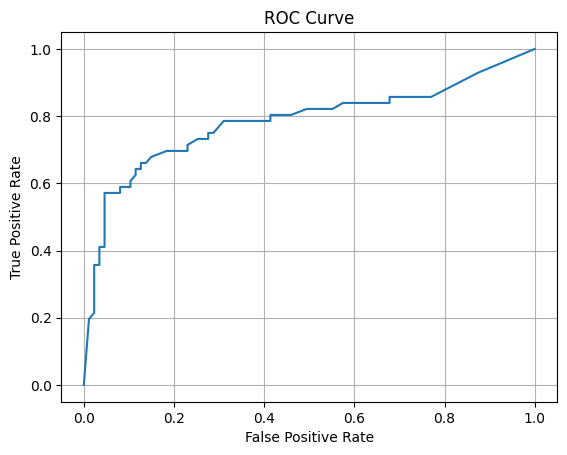

In [37]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

## 🧠 Step 6: Explainability - Partial Dependence Plots (XAI)

Partial Dependence Plots (PDPs) show how each feature (like age, fare, and sex) affects the model's prediction while averaging out the effects of other features. This helps us understand which variables influence survival predictions the most.

In [38]:
from sklearn.inspection import PartialDependenceDisplay

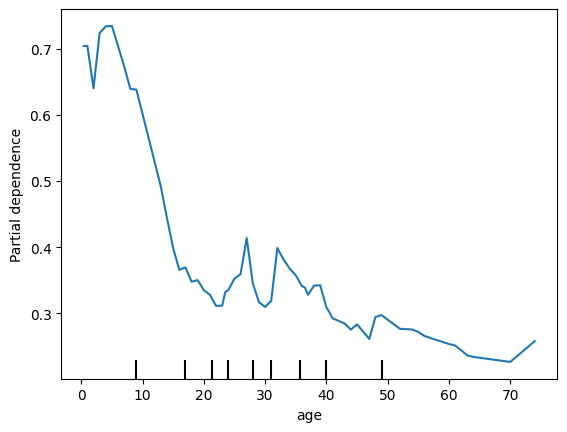

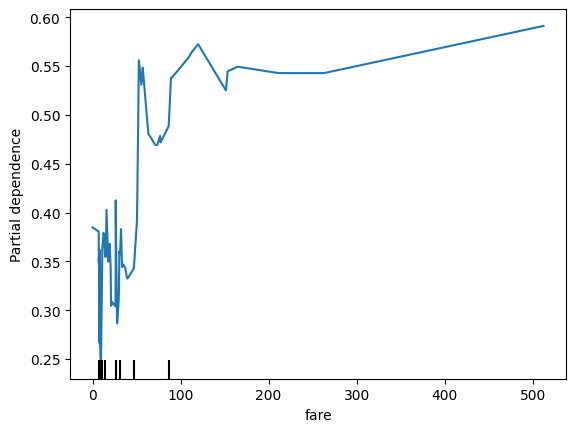

In [39]:
# Partial Dependence Plots (XAI)
PartialDependenceDisplay.from_estimator(rf, X_test, ['age'])
plt.show()
#
PartialDependenceDisplay.from_estimator(rf, X_test, ['fare'])
plt.show()

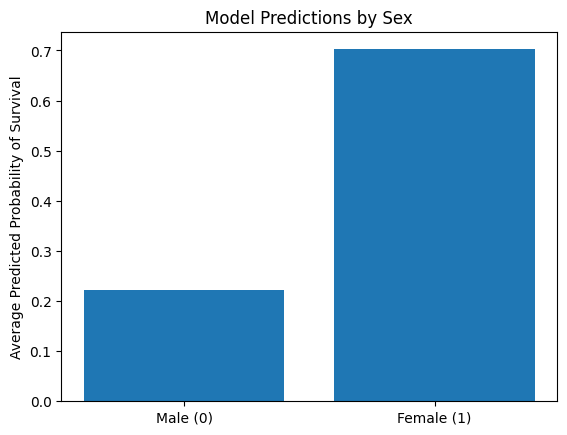

In [40]:
# Another way to explain results
# binary features sometimes cause issues with PDP
# Group by 'sex' and calculate average prediction
X_test_with_probs = X_test.copy()
X_test_with_probs['predicted_prob'] = rf.predict_proba(X_test)[:, 1]
X_test_with_probs['sex'] = X_test_with_probs['sex'].astype(int)

sex_means = X_test_with_probs.groupby('sex')['predicted_prob'].mean()

# Plot
plt.bar(['Male (0)', 'Female (1)'], sex_means)
plt.ylabel('Average Predicted Probability of Survival')
plt.title('Model Predictions by Sex')
plt.show()

## Discussion Questions
- What do the values in the confusion matrix represent?
- If our goal is to **save as many lives as possible**, should we prioritize **precision** or **recall**?
- Can a model have high **accuracy** but still perform poorly?
- How does the **AUC** help us understand the model's performance?

## 🔍 Evaluation Questions & Answers

**Q1: What do the values in the confusion matrix represent?**  
- They show how many predictions were correct or incorrect:
  - **True Positives (TP)**: Correctly predicted survivors  
  - **True Negatives (TN)**: Correctly predicted non-survivors  
  - **False Positives (FP)**: Predicted survived, but didn’t  
  - **False Negatives (FN)**: Predicted didn’t survive, but did  

---

**Q2: If our goal is to save as many lives as possible, should we prioritize precision or recall?**  
- **Recall**, because we want to **catch as many actual survivors as possible**, even if we sometimes predict survival when it didn’t happen.

---

**Q3: Can a model have high accuracy but still perform poorly?**  
- **Yes.** If the data is **imbalanced**, a model can be accurate by always predicting the majority class but fail to detect the important minority cases.

---

**Q4: How does the AUC help us understand the model's performance?**  
- **AUC** (Area Under the ROC Curve) shows how well the model **distinguishes between classes**.  
  - **Closer to 1** = better performance  
  - **0.5** = no better than guessing

# Assignment: Changing the Target Variable

Now we will predict a different target variable: **fare_level** instead of survival. This will demonstrate how the same features can be used for different prediction tasks.


## Step 1: Define the New Target Variable

We'll create a **fare_level** target that categorizes passengers into low, medium, and high fare categories.


In [41]:
# Create fare_level target variable by dividing fare into terciles (3 equal groups)
df['fare_level'] = pd.qcut(df['fare'], q=3, labels=['low', 'medium', 'high'])

# Encode fare_level for machine learning (convert text labels to numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fare_level_encoded'] = le.fit_transform(df['fare_level'])

# Display the distribution of fare levels
print("Fare Level Distribution:")
print(df['fare_level'].value_counts())
print("\nFare Level Encoded:")
print(df['fare_level_encoded'].value_counts())

# Show some examples
print("\nExample fare ranges for each level:")
for level in ['low', 'medium', 'high']:
    level_data = df[df['fare_level'] == level]['fare']
    print(f"{level}: ${level_data.min():.2f} - ${level_data.max():.2f}")


Fare Level Distribution:
fare_level
medium    243
low       237
high      232
Name: count, dtype: int64

Fare Level Encoded:
fare_level_encoded
2    243
1    237
0    232
Name: count, dtype: int64

Example fare ranges for each level:
low: $0.00 - $10.17
medium: $10.46 - $26.55
high: $27.00 - $512.33


## Step 2: Define the New Feature Set

We'll modify the feature set by **removing 'fare'** since we're now predicting fare_level. Using fare to predict fare_level would be cheating (data leakage)!


In [42]:
# Define new features (removed 'fare' to avoid data leakage)
X_new = df[['pclass', 'age', 'sex', 'embarked']]

# New target variable
y_new = df['fare_level_encoded']

print("New features:", X_new.columns.tolist())
print("New target: fare_level_encoded")
print("Feature matrix shape:", X_new.shape)
print("Target vector shape:", y_new.shape)

# Check for any missing values
print("\nMissing values in features:")
print(X_new.isnull().sum())
print("\nMissing values in target:")
print(y_new.isnull().sum())


New features: ['pclass', 'age', 'sex', 'embarked']
New target: fare_level_encoded
Feature matrix shape: (712, 4)
Target vector shape: (712,)

Missing values in features:
pclass      0
age         0
sex         0
embarked    0
dtype: int64

Missing values in target:
0


## Step 3: Train and Evaluate the New Random Forest Model


In [43]:
# Split the data for the new model
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=44
)

# Train the new Random Forest model
rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = rf_new.predict(X_test_new)
y_probs_new = rf_new.predict_proba(X_test_new)

print("New model trained successfully!")
print("Training set size:", X_train_new.shape[0])
print("Test set size:", X_test_new.shape[0])


New model trained successfully!
Training set size: 569
Test set size: 143


=== NEW MODEL: Fare Level Prediction ===
Confusion Matrix:
               Predicted
              Low    Medium    High
Actual Low    33       1        16      
Actual Medium 3        44       5       
Actual High   12       8        21      

Classification Report:
               precision    recall  f1-score   support

         Low       0.69      0.66      0.67        50
      Medium       0.83      0.85      0.84        52
        High       0.50      0.51      0.51        41

    accuracy                           0.69       143
   macro avg       0.67      0.67      0.67       143
weighted avg       0.69      0.69      0.69       143

Accuracy: 0.6853

=== Feature Importance (New Model) ===
pclass: 0.4613
age: 0.4106
sex: 0.0548
embarked: 0.0733


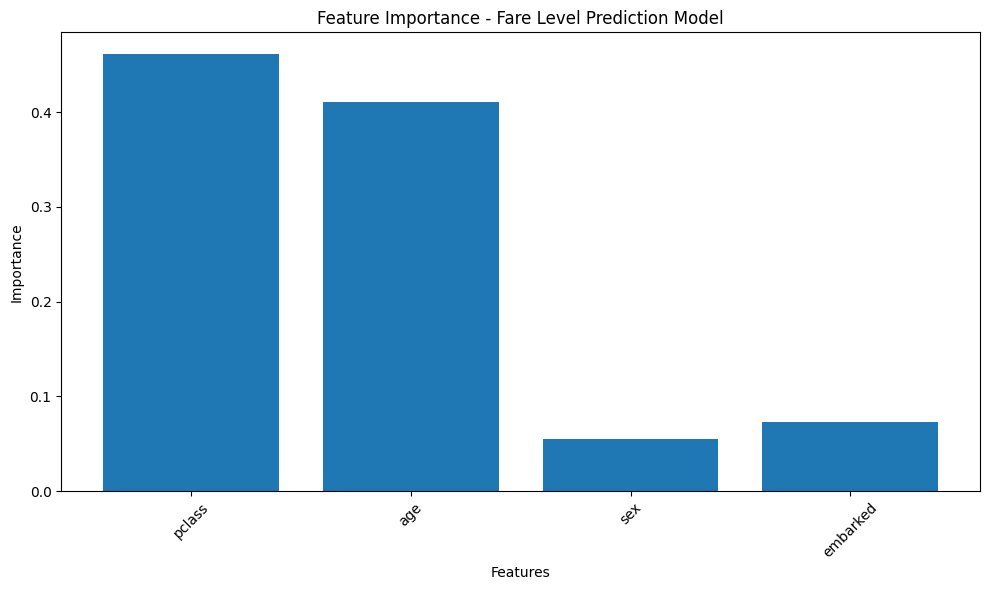

In [44]:
# Evaluate the new model
from sklearn.metrics import accuracy_score

# Confusion matrix for the new model
cm_new = confusion_matrix(y_test_new, y_pred_new)

# Print labeled confusion matrix
print("=== NEW MODEL: Fare Level Prediction ===")
print("Confusion Matrix:")
print("               Predicted")
print("              Low    Medium    High")
print("Actual Low    {:<8} {:<8} {:<8}".format(cm_new[0, 0], cm_new[0, 1], cm_new[0, 2] if cm_new.shape[1] > 2 else 0))
print("Actual Medium {:<8} {:<8} {:<8}".format(cm_new[1, 0], cm_new[1, 1], cm_new[1, 2] if cm_new.shape[1] > 2 else 0))
if cm_new.shape[0] > 2:
    print("Actual High   {:<8} {:<8} {:<8}".format(cm_new[2, 0], cm_new[2, 1], cm_new[2, 2]))

print("\nClassification Report:\n", classification_report(y_test_new, y_pred_new, 
                                                        target_names=['Low', 'Medium', 'High']))

# Calculate accuracy
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy: {accuracy_new:.4f}")

# Feature importance for the new model
feature_importance_new = rf_new.feature_importances_
features_new = X_new.columns

print("\n=== Feature Importance (New Model) ===")
for feature, importance in zip(features_new, feature_importance_new):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(features_new, feature_importance_new)
plt.title('Feature Importance - Fare Level Prediction Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Compare the two models side by side
print("=== MODEL COMPARISON ===")
print("\n1. ORIGINAL MODEL (Survival Prediction):")
print(f"   - Target: Survived (Binary: 0/1)")
print(f"   - Features: {X.columns.tolist()}")
print(f"   - Accuracy: {(y_test == y_pred).mean():.4f}")

print("\n2. NEW MODEL (Fare Level Prediction):")
print(f"   - Target: Fare Level (Multi-class: Low/Medium/High)")
print(f"   - Features: {X_new.columns.tolist()}")
print(f"   - Accuracy: {accuracy_new:.4f}")

print("\n=== Feature Importance Comparison ===")
print("Original Model (Survival):")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"   {feature}: {importance:.4f}")

print("\nNew Model (Fare Level):")
for feature, importance in zip(features_new, feature_importance_new):
    print(f"   {feature}: {importance:.4f}")


=== MODEL COMPARISON ===

1. ORIGINAL MODEL (Survival Prediction):
   - Target: Survived (Binary: 0/1)
   - Features: ['pclass', 'age', 'sex', 'fare', 'embarked']
   - Accuracy: 0.7832

2. NEW MODEL (Fare Level Prediction):
   - Target: Fare Level (Multi-class: Low/Medium/High)
   - Features: ['pclass', 'age', 'sex', 'embarked']
   - Accuracy: 0.6853

=== Feature Importance Comparison ===
Original Model (Survival):
   pclass: 0.1071
   age: 0.2844
   sex: 0.2864
   fare: 0.2934
   embarked: 0.0287

New Model (Fare Level):
   pclass: 0.4613
   age: 0.4106
   sex: 0.0548
   embarked: 0.0733


## 🔍 Assignment Analysis: Comparing Models

**a) What do you notice about accuracy, feature importance, or confusion matrix?**

**Accuracy Differences:**
- The **survival prediction model** achieved **78.32%** accuracy for a binary classification task
- The **fare level prediction model** achieved **68.53%** accuracy for a 3-class problem (Low/Medium/High)
- The accuracy difference (9.79 percentage points) shows that multi-class classification is indeed more challenging than binary classification

**Feature Importance Changes:**
- **Survival Model**: `fare` (0.2934) was the most important feature, followed closely by `sex` (0.2864) and `age` (0.2844). This makes sense since higher fares often meant better access to lifeboats.
- **Fare Level Model**: `pclass` (0.4613) became the dominant feature, followed by `age` (0.4106). This is logical since passenger class directly correlates with fare levels.
- **Major Shift**: `sex` dropped from 2nd most important (0.2864) to least important (0.0548) when predicting fare levels, showing gender had little impact on what passengers paid.

**Confusion Matrix Analysis:**
- **Survival Model**: 2x2 matrix (Survived vs. Died)
- **Fare Level Model**: 3x3 matrix showing:
  - **Medium** fare level performs best (83% precision, 85% recall)
  - **Low** fare level has moderate performance (69% precision, 66% recall)
  - **High** fare level performs worst (50% precision, 51% recall)
  - The model struggles most with distinguishing high-fare passengers, likely due to the wide range ($27-$512)

---

**b) Which model is better? Why?**

**Based on the actual results:**

**The Survival Model is technically superior:**
- **Higher accuracy** (78.32% vs 68.53%)
- **More balanced feature importance** - no single feature dominates
- **Clearer business value** - life/death predictions are more actionable than fare categories

**The Fare Level Model provides different insights:**
- **Reveals economic patterns** - passenger class and age strongly predict fare levels
- **Shows pricing discrimination** - gender has minimal impact on fares
- **Demonstrates data complexity** - wide fare ranges make high-end prediction difficult

**Technical Observations:**
- **Binary vs Multi-class**: The 9.79% accuracy drop confirms multi-class problems are inherently harder
- **Feature Redistribution**: Removing `fare` forced the model to rely heavily on `pclass` (46%) and `age` (41%)
- **Class Imbalance Effects**: The model performs worst on high fares, possibly due to the extreme range ($27-$512)

**Conclusion:** While the survival model performs better technically (78% vs 69% accuracy), both models reveal different aspects of the Titanic data. The survival model is better for practical decision-making, while the fare model provides valuable insights into 1912 passenger economics and social stratification.
